In [1]:
import numpy as np
import pandas as pd

In [2]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 100)
pd.set_option('display.max_colwidth', 250)

## 피벗 테이블
* 소량의 데이터는 별 다른 수고없이 통계분석 가능
* 하지만, 대량의 데이터는 통계분석하기 어려움
* 수 많은 데이터 중에서 원하는 데이터만 골라서 테이블을 재구성한 것을 의미
* pivot(행, 열, 대상)
* pivot_table()

In [6]:
city = ['서울','서울','서울','부산','부산','부산','인천','인천']
year = [2015, 2010, 2005, 2015, 2010, 2005, 2015, 2020]
pop = [9904312, 9631482, 9762546, 3448737, 3393191, 1122454, 5533343, 5513651]
region = ['수도권', '수도권', '수도권', '경상권', '경상권', '경상권', '수도권', '수도권' ]
          


In [7]:
data = {'도시': city, '연도':year, '인구':pop, '지역':region}

df = pd.DataFrame(data, index=np.arange(1,9))

df.head()

,도시,연도,인구,지역
1,서울,2015,9904312,수도권
2,서울,2010,9631482,수도권
3,서울,2005,9762546,수도권
4,부산,2015,3448737,경상권
5,부산,2010,3393191,경상권


In [14]:
pv = df.pivot('도시','연도','인구')

for c in pv.columns:
    pv[c] = pv[c].apply(lambda x :('{:,.0f}').format(x))

    
pv


연도,2005,2010,2015,2020
도시,,,,
부산,"1,122,454","3,393,191","3,448,737",nan
서울,"9,762,546","9,631,482","9,904,312",nan
인천,nan,nan,"5,533,343","5,513,651"


In [9]:
df.pivot('연도','도시','인구')

도시,부산,서울,인천
연도,,,
2005,1122454.0,9762546.0,NaN
2010,3393191.0,9631482.0,NaN
2015,3448737.0,9904312.0,5533343.0
2020,NaN,NaN,5513651.0


In [15]:
df.groupby(['도시','연도'])['인구'].sum()

도시  연도  
부산  2005    1122454
    2010    3393191
    2015    3448737
서울  2005    9762546
    2010    9631482
    2015    9904312
인천  2015    5533343
    2020    5513651
Name: 인구, dtype: int64

## pivot_table
* pivot과 groupby를 적당히 섞은 함수
* pivot에서 지원하지 않는 다양한 집계함수를 지원
* pivot_table(대상, 행, 열, 집계함수, 총계여부)

In [17]:
# 도시별 연도별 인구수
df.pivot_table('인구','도시','연도').style.format('{:,.0f}')

연도,2005,2010,2015,2020
도시,,,,
부산,"1,122,454","3,393,191","3,448,737",nan
서울,"9,762,546","9,631,482","9,904,312",nan
인천,nan,nan,"5,533,343","5,513,651"


In [20]:
df.pivot_table('인구','도시','연도', margins = True, margins_name='총계').style.format('{:,.0f}')

연도,2005,2010,2015,2020,총계
도시,,,,,
부산,"1,122,454","3,393,191","3,448,737",nan,"2,654,794"
서울,"9,762,546","9,631,482","9,904,312",nan,"9,766,113"
인천,nan,nan,"5,533,343","5,513,651","5,523,497"
총계,"5,442,500","6,512,336","6,295,464","5,513,651","6,038,714"


In [25]:
# 도시별 연도별 인구수(도시와 연도를 행에 출력)
df.pivot_table('인구', ['도시','연도']).style.format('{:,.0f}')

In [27]:
import seaborn as sns

In [28]:
tips = sns.load_dataset('tips')

In [29]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [32]:
#  성별 요일별 팁 현황
tips.pivot_table('tip','sex','day', aggfunc=sum)

day,Thur,Fri,Sat,Sun
sex,,,,
Male,89.41,26.93,181.95,186.78
Female,82.42,25.03,78.45,60.61


In [33]:
tips.groupby(['sex','day'])['tip'].sum()

sex     day 
Male    Thur     89.41
        Fri      26.93
        Sat     181.95
        Sun     186.78
Female  Thur     82.42
        Fri      25.03
        Sat      78.45
        Sun      60.61
Name: tip, dtype: float64

In [37]:
# 팁을 준 고객의 성별 분류
tips.groupby('sex')['tip'].count()

sex
Male      157
Female     87
Name: tip, dtype: int64

In [38]:
tips.pivot_table('tip','sex',aggfunc=np.count_nonzero)

,tip
sex,
Male,157
Female,87


In [39]:
# 성별 흡연/비흡연 고객 분류 
tips.groupby(['sex','smoker'])['tip'].count()

sex     smoker
Male    Yes       60
        No        97
Female  Yes       33
        No        54
Name: tip, dtype: int64

In [40]:
tips.pivot_table('tip', ['sex','smoker'], aggfunc=np.count_nonzero)

tip
sex    smoker     
Male   Yes      60
       No       97
Female Yes      33
       No       54

In [44]:
# CDC에서 수집한 연도별 신생아 성별 출생수 데이터
births= pd.read_csv('csv/births.csv')
births

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548
...,...,...,...,...,...
15542,2008,10,NaN,M,183219
15543,2008,11,NaN,F,158939
15544,2008,11,NaN,M,165468
15545,2008,12,NaN,F,173215


In [45]:
# 연도별 출생수
births.pivot_table('births', 'year', aggfunc=sum)

,births
year,
1969,3600206
1970,3737800
1971,3563548
1972,3266235
1973,3146125
1974,3170631
1975,3153556
1976,3176476
1977,3332159


In [47]:
#  월별 출생수
births.pivot_table('births','month', aggfunc=sum)

,births
month,
1,12364197
2,11541178
3,12678844
4,12085891
5,12624972
6,12521070
7,13367556
8,13528007
9,13252831


In [48]:
# 성별 출생수
births.pivot_table('births', 'gender', aggfunc=sum)

,births
gender,
F,74035823
M,77738555


In [49]:
# 연도별 성별 출생 수
births.pivot_table('births','year', 'gender', aggfunc=sum)

gender,F,M
year,,
1969,1753634,1846572
1970,1819164,1918636
1971,1736774,1826774
1972,1592347,1673888
1973,1533102,1613023
1974,1543005,1627626
1975,1535546,1618010
1976,1547613,1628863
1977,1623363,1708796


## 2016년 미국 대통령 선거 데이터 분석 예제
* primary_results.csv
* county_facts.csv

In [52]:
primary = pd.read_csv('csv/primary_results.txt')

primary

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
0,Alabama,AL,Autauga,1001.0,Democrat,Bernie Sanders,544,0.182
1,Alabama,AL,Autauga,1001.0,Democrat,Hillary Clinton,2387,0.800
2,Alabama,AL,Baldwin,1003.0,Democrat,Bernie Sanders,2694,0.329
3,Alabama,AL,Baldwin,1003.0,Democrat,Hillary Clinton,5290,0.647
4,Alabama,AL,Barbour,1005.0,Democrat,Bernie Sanders,222,0.078
...,...,...,...,...,...,...,...,...
24606,Wyoming,WY,Teton-Sublette,95600028.0,Republican,Ted Cruz,0,0.000
24607,Wyoming,WY,Uinta-Lincoln,95600027.0,Republican,Donald Trump,0,0.000
24608,Wyoming,WY,Uinta-Lincoln,95600027.0,Republican,John Kasich,0,0.000
24609,Wyoming,WY,Uinta-Lincoln,95600027.0,Republican,Marco Rubio,0,0.000


In [54]:
counties = pd.read_csv('csv/county_facts.txt')

counties

,fips,area_name,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,SEX255214,RHI125214,RHI225214,RHI325214,RHI425214,RHI525214,RHI625214,RHI725214,RHI825214,POP715213,POP645213,POP815213,EDU635213,EDU685213,VET605213,...,HSG495213,HSD410213,HSD310213,INC910213,INC110213,PVY020213,BZA010213,BZA110213,BZA115213,NES010213,SBO001207,SBO315207,SBO115207,SBO215207,SBO515207,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
0,0,United States,NaN,318857056,308758105,3.3,308745538,6.2,23.1,14.5,50.8,77.4,13.2,1.2,5.4,0.2,2.5,17.4,62.1,84.9,12.9,20.7,86.0,28.8,21263779,...,176700,115610216,2.63,28155,53046,15.4,7488353,118266253,2.0,23005620,27092908,7.1,0.9,5.7,0.1,8.3,28.8,5319456312,4174286516,3917663456,12990,613795732,1046363,3531905.43,87.4
1,1000,Alabama,NaN,4849377,4780127,1.4,4779736,6.1,22.8,15.3,51.5,69.7,26.7,0.7,1.3,0.1,1.5,4.1,66.2,85.0,3.5,5.2,83.1,22.6,388865,...,122500,1838683,2.55,23680,43253,18.6,97578,1603100,1.1,311578,382350,14.8,0.8,1.8,0.1,1.2,28.1,112858843,52252752,57344851,12364,6426342,13369,50645.33,94.4
2,1001,Autauga County,AL,55395,54571,1.5,54571,6.0,25.2,13.8,51.4,77.9,18.7,0.5,1.1,0.1,1.8,2.7,75.6,85.0,1.6,3.5,85.6,20.9,5922,...,136200,20071,2.71,24571,53682,12.1,817,10120,2.1,2947,4067,15.2,0.0,1.3,0.0,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
3,1003,Baldwin County,AL,200111,182265,9.8,182265,5.6,22.2,18.7,51.2,87.1,9.6,0.7,0.9,0.1,1.6,4.6,83.0,82.1,3.6,5.5,89.1,27.7,19346,...,168600,73283,2.52,26766,50221,13.9,4871,54988,3.7,16508,19035,2.7,0.4,1.0,0.0,1.3,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6
4,1005,Barbour County,AL,26887,27457,-2.1,27457,5.7,21.2,16.5,46.6,50.2,47.6,0.6,0.5,0.2,0.9,4.5,46.6,84.8,2.9,5.0,73.7,13.4,2120,...,89200,9200,2.66,16829,32911,26.7,464,6611,-5.6,1546,1667,0.0,0.0,0.0,0.0,0.0,27.0,0,0,188337,6334,0,8,884.88,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190,56037,Sweetwater County,WY,45010,43806,2.7,43806,7.3,27.0,9.5,48.1,94.3,1.5,1.3,0.9,0.2,1.8,15.8,79.7,80.4,5.5,9.8,91.0,18.1,3701,...,177300,16682,2.62,30517,71525,11.3,1347,17053,-2.8,2165,4052,0.0,0.0,0.7,0.0,3.8,27.2,0,437493,898189,22843,150439,227,10426.65,4.2
3191,56039,Teton County,WY,22930,21294,7.7,21294,5.7,19.1,12.2,48.2,94.9,1.2,1.0,1.3,0.1,1.5,15.2,80.9,86.0,9.1,15.1,96.8,48.7,1353,...,660100,7583,2.76,43444,68078,8.2,1952,15357,0.3,4609,5974,0.0,0.0,0.5,0.0,3.3,25.3,0,0,515644,25688,327363,145,3995.38,5.3
3192,56041,Uinta County,WY,20904,21118,-1.0,21118,7.6,29.8,11.0,49.6,95.4,0.9,1.2,0.5,0.2,1.8,9.2,87.3,81.8,3.4,6.6,89.2,18.9,1359,...,181700,7290,2.85,25513,58515,13.3,595,7712,-1.6,1366,1983,0.0,0.0,0.0,0.0,2.2,15.9,0,159375,413983,20626,35497,40,2081.26,10.1
3193,56043,Washakie County,WY,8322,8533,-2.5,8533,5.5,23.9,20.1,49.3,94.8,0.8,1.7,0.7,0.1,1.8,13.9,82.7,88.0,5.0,10.4,90.5,23.6,752,...,162600,3468,2.40,28308,47104,12.1,378,2986,-2.6,665,845,0.0,0.0,0.0,0.0,0.0,26.9,0,12128,98308,12596,10175,4,2238.55,3.8


In [56]:
# 분석 1 : 각 후보별(candidate) 전체 지역 득표수(votes)
# 분석 2 : 각 주별(state) 정당별(party) 득표수(votes)
# 분석 3 : 정당별 당선된 후보으이 백인유권자 수
# counties의 RHI125214 컬럼은 백인유권자 비율 -> '백인유권자들은 공화당 후보를 주로 밀어준다'

### 시각화 : 객체명.plot(kind='bar')

In [66]:
primary.shape

(24611, 8)

In [70]:
primary.info()


primary.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24611 entries, 0 to 24610
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   state               24611 non-null  object 
 1   state_abbreviation  24611 non-null  object 
 2   county              24611 non-null  object 
 3   fips                24511 non-null  float64
 4   party               24611 non-null  object 
 5   candidate           24611 non-null  object 
 6   votes               24611 non-null  int64  
 7   fraction_votes      24611 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 1.5+ MB


,fips,votes,fraction_votes
count,2.451100e+04,24611.000000,24611.000000
mean,2.667152e+07,2306.252773,0.304524
std,4.200978e+07,9861.183572,0.231401
min,1.001000e+03,0.000000,0.000000
25%,2.109100e+04,68.000000,0.094000
50%,4.208100e+04,358.000000,0.273000
75%,9.090012e+07,1375.000000,0.479000
max,9.560004e+07,590502.000000,1.000000


In [72]:
# 분석 1 :: 후보 수 확인
# 명목형 변수에 대한 카운트

primary.candidate.value_counts()

Bernie Sanders     4205
Hillary Clinton    4205
Donald Trump       3586
John Kasich        3586
Ted Cruz           3586
Marco Rubio        2555
Ben Carson         1669
 No Preference      351
Jeb Bush            155
Carly Fiorina       109
Chris Christie      109
 Uncommitted         99
Martin O'Malley      99
Mike Huckabee        99
Rand Paul            99
Rick Santorum        99
Name: candidate, dtype: int64

In [77]:
primary.groupby('candidate')['votes'].count()

candidate
 No Preference      351
 Uncommitted         99
Ben Carson         1669
Bernie Sanders     4205
Carly Fiorina       109
Chris Christie      109
Donald Trump       3586
Hillary Clinton    4205
Jeb Bush            155
John Kasich        3586
Marco Rubio        2555
Martin O'Malley      99
Mike Huckabee        99
Rand Paul            99
Rick Santorum        99
Ted Cruz           3586
Name: votes, dtype: int64

In [79]:
# 후보자별 득표수
primary.groupby('candidate')['votes'].sum()

candidate
 No Preference         8152
 Uncommitted             43
Ben Carson           564553
Bernie Sanders     11959102
Carly Fiorina         15191
Chris Christie        24353
Donald Trump       13302541
Hillary Clinton    15692452
Jeb Bush              94411
John Kasich         4159949
Marco Rubio         3321076
Martin O'Malley         752
Mike Huckabee          3345
Rand Paul              8479
Rick Santorum          1782
Ted Cruz            7603006
Name: votes, dtype: int64

In [80]:
primary.party.value_counts()

Republican    15652
Democrat       8959
Name: party, dtype: int64

In [82]:
# 공화당 후보자별 득표 수

search = primary.party == 'Republican'
republic = primary[search]
republic.groupby(['candidate'])['votes'].sum()

candidate
Ben Carson          564553
Carly Fiorina        15191
Chris Christie       24353
Donald Trump      13302541
Jeb Bush             94411
John Kasich        4159949
Marco Rubio        3321076
Mike Huckabee         3345
Rand Paul             8479
Rick Santorum         1782
Ted Cruz           7603006
Name: votes, dtype: int64

In [83]:
# 민주당 후보자별 득표 수 
search = primary.party == 'Democrat'
democrat = primary[search]
democrat.groupby(['candidate'])['votes'].sum()

candidate
 No Preference         8152
 Uncommitted             43
Bernie Sanders     11959102
Hillary Clinton    15692452
Martin O'Malley         752
Name: votes, dtype: int64

<AxesSubplot:xlabel='state'>

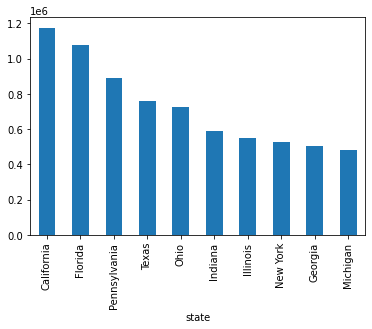

In [101]:
# 경선에서 당선된 후보별 지역 득표수
search = primary.candidate == 'Donald Trump'

vote1 = primary[search]
vote1 = vote1.groupby('state')['votes'].sum().sort_values(ascending=False).head(10)


# vote1.sort_values(ascending=False).head()

vote1.plot(kind='bar')


<AxesSubplot:xlabel='state'>

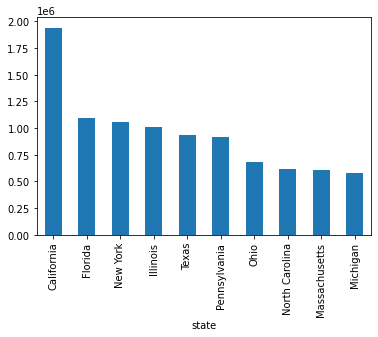

In [102]:
search = primary.candidate == 'Hillary Clinton'
vote2 = primary[search]
vote2 = vote2.groupby('state')['votes'].sum().sort_values(ascending=False).head(10)

vote2.plot(kind='bar')
# vote2.sort_values( ascending=False).head()

In [118]:
# 분석2 : 각 주 state별 정당party별 득표 vates 수 
search = (primary.candidate == 'Donald Trump') | (primary.candidate == 'Hillary Clinton')
vote3 = primary[search]
vote3a = primary.groupby(['state','party'])['votes'].sum()

<AxesSubplot:xlabel='state,party'>

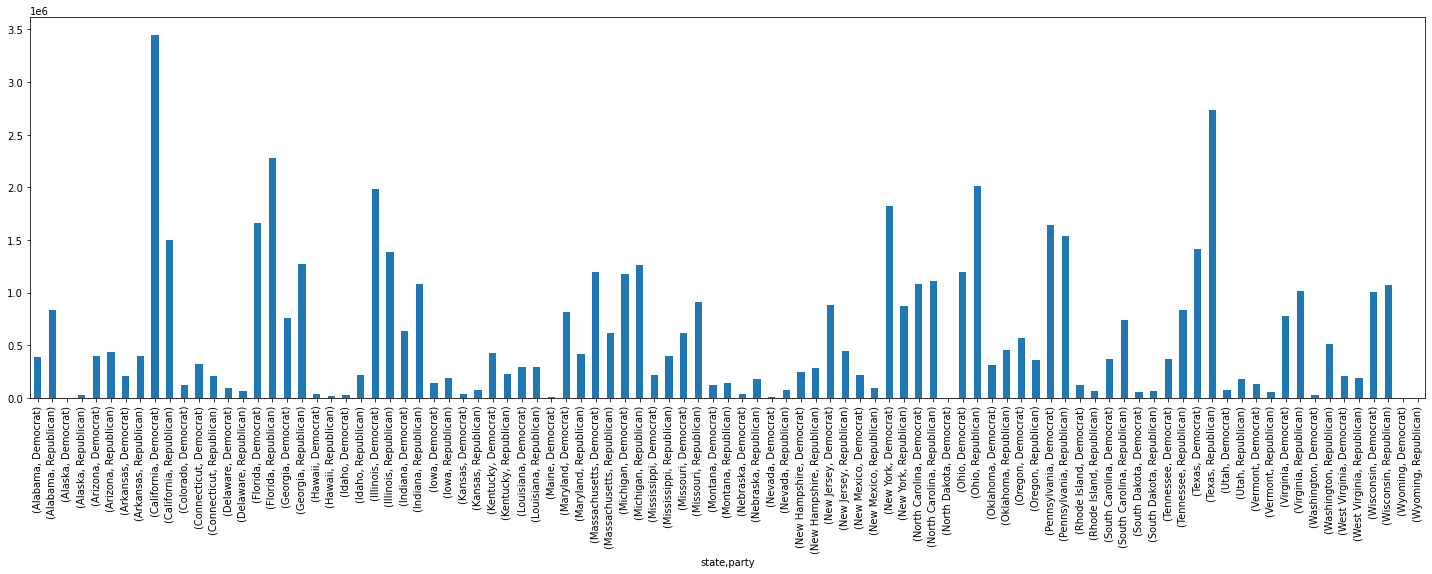

In [119]:
vote3a.plot(kind='bar', figsize=(25, 7))

### 그룹핑한 결과는 다중인덱스를 가진 데이터프레임으로 출력
* 1st index : state
* 2nd index : party
* 값 : votes 

* 세로로 길게 출력되는  표형태를 따름 : long table -> 다중 인덱스 때문에 그래프가 제대로 출력되니 않음
* 다중 인덱스를 각 열로 표시하는 wide table 형태로 작성 해야 한다
* long table -> wide table :: unstack함수 사용
* pivot_table 함수로 그룹핑 하면 wide table로 출력 


In [124]:
vote3b = vote3.pivot_table('votes','state','party', aggfunc=sum)
vote3b

party,Democrat,Republican
state,,
Alabama,309928.0,371735.0
Alaska,99.0,7346.0
Arizona,235697.0,249916.0
Arkansas,144580.0,133144.0
California,1940580.0,1174829.0
Colorado,49256.0,NaN
Connecticut,170075.0,123367.0
Delaware,55950.0,42472.0
Florida,1097400.0,1077221.0


<AxesSubplot:xlabel='state'>

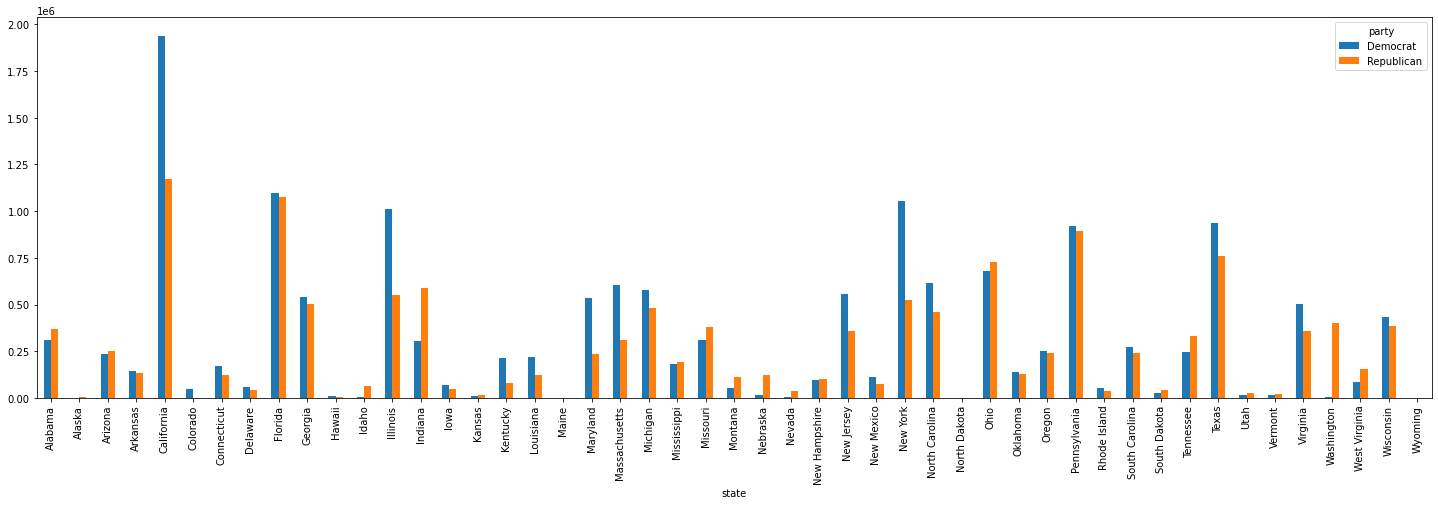

In [125]:
vote3b.plot(kind='bar', figsize=(25,7))

<AxesSubplot:xlabel='state'>

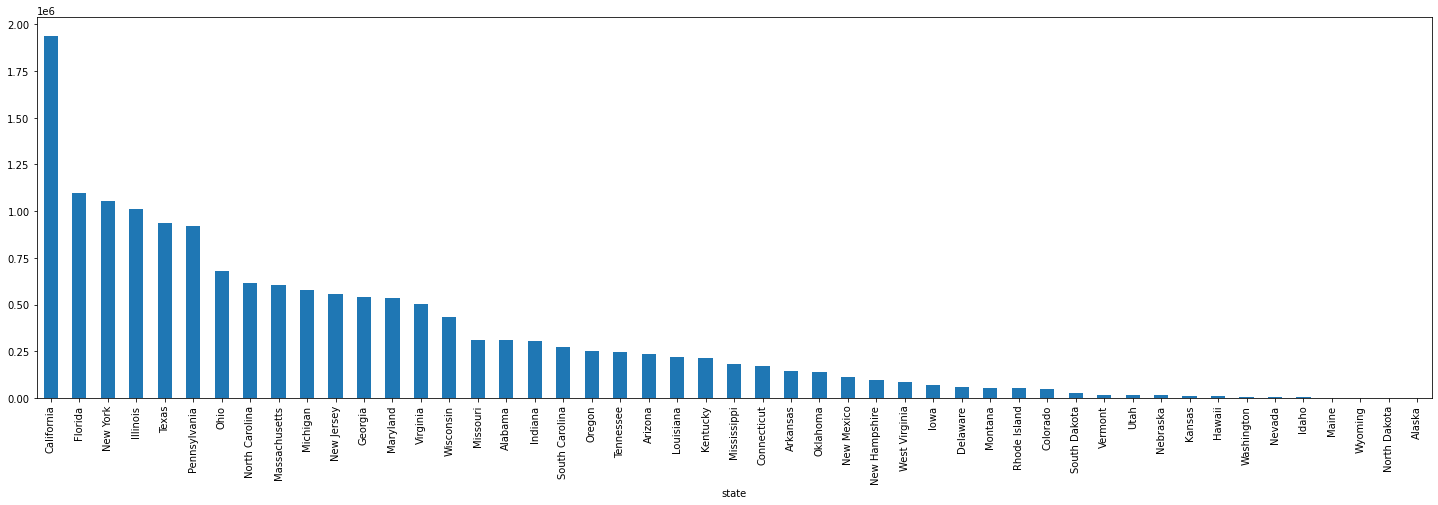

In [132]:
vote3b['Democrat'].sort_values(ascending=False).plot(kind='bar', figsize=(25,7))
# vote3b['Republican'].sort_values(ascending=False).head()